## Что входит в работу


1. Загрузить данные и провести разведочный анализ.
2. Предположить оптимальное количество кластеров.
3. Очистить и подготовить данные для использования в моделях машинного обучения.
4. Построить модель кластеризации с помощью библиотеки Scikit-learn и вычислить оптимальное количество кластеров.
5. Визуализировать результаты кластеризации.
6. Интерпретировать полученные результаты.
7. Подкрепить выводы интерпретации визуализациями.

# Задача

Имеется набор данных `marketing_campaign.csv` о покупателях супермаркета.

* ID: уникальный идентификатор клиента.
* Year_Birth: год рождения клиента.
* Dt_Customer: дата регистрации клиента на сайте.
* Recency: количество дней с момента последней покупки клиента.
* Complain: 1, если клиент жаловался на обслуживание за последние два года, 0 в противном случае.
* MntFruits: сумма, потраченная на фрукты за последние два года.
* MntMeatProducts: сумма, потраченная на мясо за последние два года.
* MntFishProducts: сумма, потраченная на рыбу за последние два года.
* MntSweetProducts: сумма, потраченная на сладости за последние два года.
* Response: 1, если клиент участвовал в последней рекламной кампании, 0 в противном случае.
* NumWebPurchases: количество покупок, совершённых через сайт.
* NumStorePurchases: количество покупок, совершённых непосредственно в магазинах.

# Загрузка датасета, разведочный анализ данных

In [234]:
import warnings

warnings.filterwarnings("ignore")

In [235]:
import pandas as pd

df = pd.read_csv('marketing campaign.csv')

df.drop('ID', axis=1, inplace=True)

df.head()

,Year_Birth,Dt_Customer,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response
0,1957,04-09-2012,58,88,546,172,88,8,4,1
1,1954,08-03-2014,38,1,6,2,1,1,2,0
2,1965,21-08-2013,26,49,127,111,21,8,10,0
3,1984,10-02-2014,26,4,20,10,3,2,4,0
4,1981,19-01-2014,94,43,118,46,27,5,6,0


In [236]:
#Для начала сразу преобразую Dt_Customer в отдельние фичи  month, year, для дальнейших исследований
#Day не столь значителен

In [237]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

df["month"] = df["Dt_Customer"].dt.month
df["year"] = df["Dt_Customer"].dt.year

df.drop('Dt_Customer', axis=1, inplace=True)

df.head()

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,month,year
0,1957,58,88,546,172,88,8,4,1,9,2012
1,1954,38,1,6,2,1,1,2,0,3,2014
2,1965,26,49,127,111,21,8,10,0,8,2013
3,1984,26,4,20,10,3,2,4,0,2,2014
4,1981,94,43,118,46,27,5,6,0,1,2014


In [238]:
df.describe().round(2)

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,month,year
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,1968.81,49.11,26.30,166.95,37.53,27.06,4.08,5.79,0.15,6.47,2013.03
std,11.98,28.96,39.77,225.72,54.63,41.28,2.78,3.25,0.36,3.49,0.68
min,1893.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2012.00
25%,1959.00,24.00,1.00,16.00,3.00,1.00,2.00,3.00,0.00,3.00,2013.00
50%,1970.00,49.00,8.00,67.00,12.00,8.00,4.00,5.00,0.00,6.00,2013.00
75%,1977.00,74.00,33.00,232.00,50.00,33.00,6.00,8.00,0.00,10.00,2013.00
max,1996.00,99.00,199.00,1725.00,259.00,263.00,27.00,13.00,1.00,12.00,2014.00


In [239]:
#Минимальный год рождения 1893 выглядит как выброс из-за опечатки при написании 1993

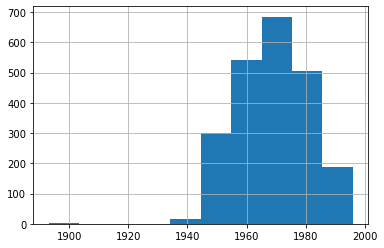

In [240]:
df.Year_Birth.hist();

In [241]:
df.Year_Birth = df.Year_Birth.apply(lambda x: x + 100 if x < 1930 else x)

#Прибавил 100 всем кто меньше 1930 года

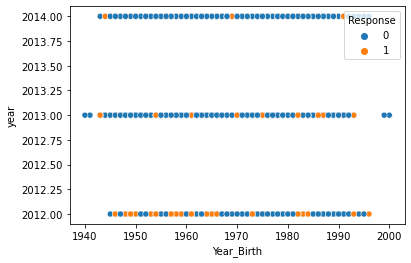

In [242]:
import seaborn as sns

sns.scatterplot(df.Year_Birth, df.year, hue=df.Response);

In [243]:
#Видно что основная часть отозвавшихся на рекламу приходится на зарегистрировавшихся в 2012
#А так-же превалирует в части тех кто старше

In [244]:
#Исследую зависимость между участием в последней акции и давностью посещения

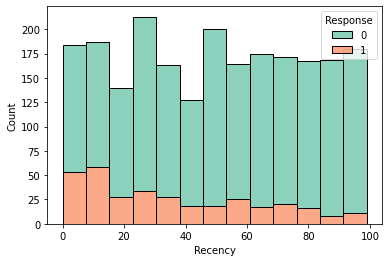

In [245]:
sns.histplot(data=df, x='Recency', hue='Response', multiple='stack', palette='Set2');

In [175]:
#Чем недавнее человек посещал магазин, тем выше вероятность что он участвовал в акции

# Первое предположение

Клиентов можно делить по давности на 2 категории: давние лояльные и не столь давние "непрогретые". 

Их можно делить на пожилых и остальных, так как пожилые люди склонны к акциям больше.

А их можно делить на недавно активных и не посещавших наш магазин последнее время.

Итого 2x2x2 = 8 категорий

# Очистка и подготовка данных

In [246]:
#Проверим выбросы

df.isna().sum()

Year_Birth           0
Recency              0
MntFruits            0
MntMeatProducts      0
MntFishProducts      0
MntSweetProducts     0
NumWebPurchases      0
NumStorePurchases    0
Response             0
month                0
year                 0
dtype: int64

In [247]:
df.describe().round(2)

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,month,year
count,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00
mean,1968.94,49.11,26.30,166.95,37.53,27.06,4.08,5.79,0.15,6.47,2013.03
std,11.74,28.96,39.77,225.72,54.63,41.28,2.78,3.25,0.36,3.49,0.68
min,1940.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2012.00
25%,1959.00,24.00,1.00,16.00,3.00,1.00,2.00,3.00,0.00,3.00,2013.00
50%,1970.00,49.00,8.00,67.00,12.00,8.00,4.00,5.00,0.00,6.00,2013.00
75%,1977.00,74.00,33.00,232.00,50.00,33.00,6.00,8.00,0.00,10.00,2013.00
max,2000.00,99.00,199.00,1725.00,259.00,263.00,27.00,13.00,1.00,12.00,2014.00


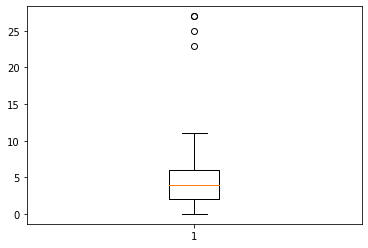

In [248]:
#В describe были виден большой максимум в кол-ве интернет покупок, лучше проработать, тоже понадобится для анализа

plt.boxplot(df.NumWebPurchases);

In [249]:
df.NumWebPurchases = df.NumWebPurchases.apply(lambda x: x == df.NumWebPurchases.median() if x > 15 else x)

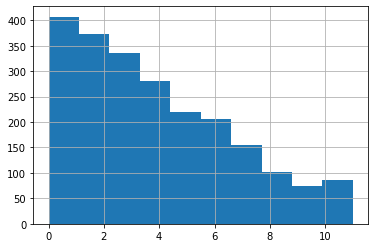

In [250]:
#Заменил всё что больше 15 медианой

df.NumWebPurchases.hist();

In [251]:
#Выбросов нет

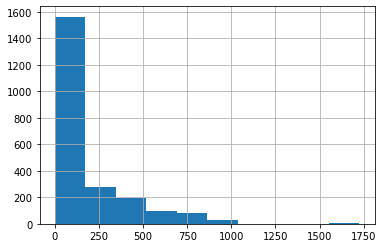

In [252]:
#максимальные 1725 штук мяса видные в describe это мощно

df.MntMeatProducts.hist();

In [253]:
#Ожидаемо, это выброс, тут не так понятно как он появился в отличии от возраста, поэтому заменю медианой

In [254]:
df.MntMeatProducts = df.MntMeatProducts.apply(lambda x: x == df.MntMeatProducts.median() if x > 1100 else x)

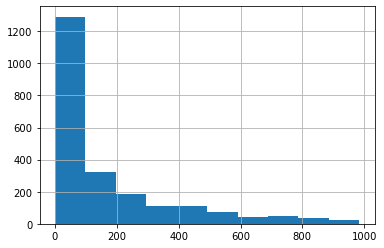

In [255]:
df.MntMeatProducts.hist();

In [256]:
#Построю график корреляций

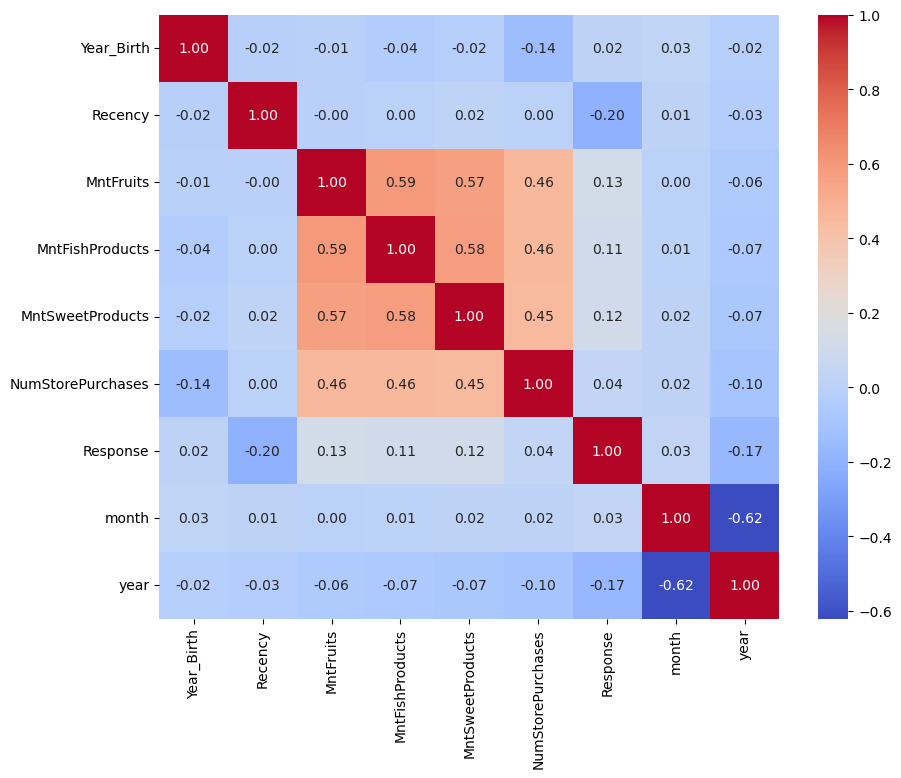

In [257]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax, fmt='.2f');

In [118]:
#Корреляции в основном только среди кол-ва купленного типа товара, что закономерно.
#И участие в акциях у "больших" покупателей выше, тоже логично.

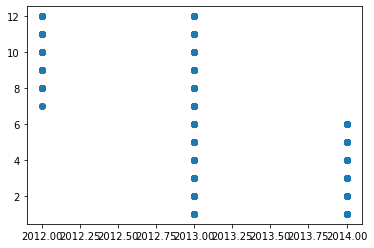

In [259]:
plt.scatter(df.year, df.month);

#Вся корреляция между месяцем и годом заключается лишь в том, с какого месяца начались регистрации и до какого месяца данные.

#В другом месяц не коррелирует ни с чем, удалю.

In [260]:
df.drop(['month'], axis=1, inplace=True)

In [261]:
#Объединю покупки онлайн и на месте

df['NumPurchases'] = df.NumStorePurchases + df.NumWebPurchases

In [262]:
df

,Year_Birth,Recency,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumWebPurchases,NumStorePurchases,Response,year,NumPurchases
0,1957,58,88,546,172,88,8,4,1,2012,12
1,1954,38,1,6,2,1,1,2,0,2014,3
2,1965,26,49,127,111,21,8,10,0,2013,18
3,1984,26,4,20,10,3,2,4,0,2014,6
4,1981,94,43,118,46,27,5,6,0,2014,11
...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,46,43,182,42,118,9,4,0,2013,13
2236,1946,56,0,30,0,0,8,5,0,2014,13
2237,1981,91,48,217,32,12,2,13,0,2014,15
2238,1956,8,30,214,80,30,6,10,0,2014,16


# Построение модели кластеризации

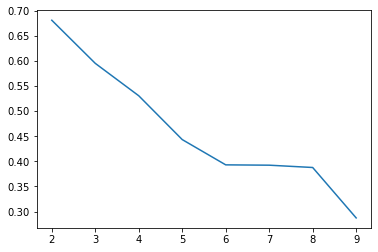

In [263]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

n_clusters = list(range(2, 10))
metrics = []

for k in n_clusters:
    km=KMeans(n_clusters=k).fit(df)
    score=silhouette_score(df, km.labels_)
    metrics.append(score)
    
sns.lineplot(n_clusters, metrics);

# Визуализация результатов

In [264]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=8)

df_emb = tsne.fit_transform(df)

data = pd.DataFrame(df_emb)

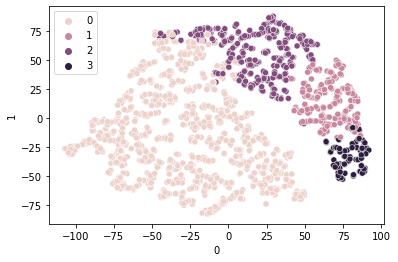

In [265]:
km = KMeans(n_clusters=4).fit(df);

sns.scatterplot(data[0], data[1], hue=km.labels_);

In [207]:
#Выглядит вполне правдоподобно

# График кластеров

In [273]:
import numpy as np


#Уже прогнав код и получив heatmap с бОльшим кол-вом фичей чем представлено ниже, я увидел что ценность имеют только эти 2
features = ['Response', 'NumPurchases']
group = km.labels_
functions = ['mean', 'std']

df_g = df.groupby(group).agg({x: functions for x in features}).T
df_g

stat = np.array([[df[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g['global']=stat
    
df_g.round(2)

0      1      2      3  global
Response     mean  0.10   0.24   0.16   0.42    0.15
             std   0.30   0.43   0.37   0.50    0.36
NumPurchases mean  7.16  13.45  14.84  13.72    9.83
             std   4.10   3.59   3.63   3.29    5.20

# Визуализация кластеров, подытоживание 

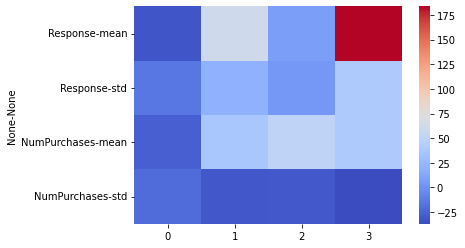

In [274]:
cluster_labels = [0, 1, 2, 3]

for label in cluster_labels:
    df_g[label] = 100* df_g[label]/df_g['global'] - 100

sns.heatmap(df_g[cluster_labels], cmap='coolwarm');

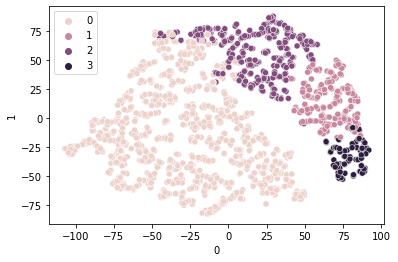

In [275]:
sns.scatterplot(data[0], data[1], hue=km.labels_);

In [ ]:
#Категория "0" - Холодные клиенты с низким кол-вом покупок (те кто воспользовались разок). Их большинство. 
#Таких нужно плавно "прогревать".

#Категория "1" - Нейтральные клиенты со средним кол-вом покупок
#Работать с такими особенно выгодно, ведь их проще перевести в активных путем спецпредложений. Их где-то 10%.

#Категория "2" - Клиенты холодные к рекламе, но активно покупающие. 
#Раз они часто покупают, но до сих пор не отозвались на рекламу, значит их можно привлечь только очень выгодным предложением. 15% 

#Категория "3" - Лояльные клиенты. Это постоянный доход бизнеса. 
#Главное поддерживать с ними связь путем предложений для лояльных клиентов. 
#Например: скидок на следующую покупку, подарками за многократные покупки.